In [6]:
%matplotlib inline

In [1]:
import pandas as pd

/Users/ricalanis/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
cities_df = pd.read_csv('cities.csv')

<AxesSubplot:>

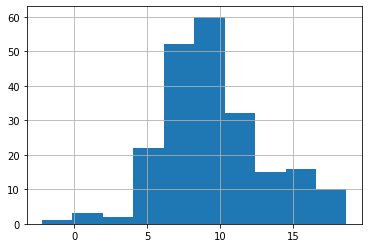

In [7]:
cities_df['temperature'].hist()

In [11]:
scaled_min_max_pand = (cities_df['temperature']-cities_df['temperature'].min())/(cities_df['temperature'].max() - cities_df['temperature'].min())

<AxesSubplot:>

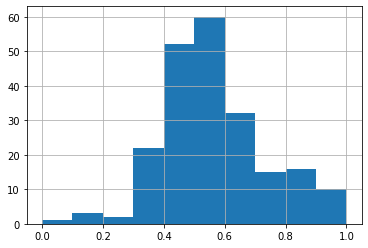

In [14]:
scaled_min_max_pand.hist()

In [12]:
min_temp = cities_df['temperature'].min()
max_temp = cities_df['temperature'].max()
scaled_min_max_app = cities_df['temperature'].apply(lambda x: (x- min_temp)/(max_temp-min_temp))

<AxesSubplot:>

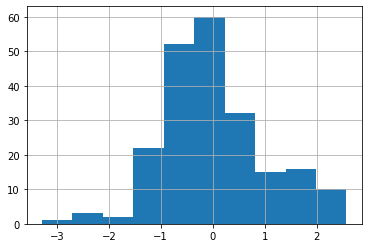

In [21]:
scaled_min_max_app.hist()

In [17]:
scaled_std_pand = (cities_df['temperature']-cities_df['temperature'].mean())/(cities_df['temperature'].std())

<AxesSubplot:>

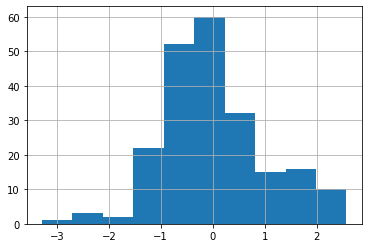

In [23]:
scaled_std_pand.hist()

In [24]:
def standarization(x, mean_temp, std_temp):
    return (x- mean_temp)/(std_temp)

In [25]:
mean_temp = cities_df['temperature'].mean()
std_temp = cities_df['temperature'].std()
scaled_std_app = cities_df['temperature'].apply(lambda x: standarization(x, mean_temp, std_temp))

<AxesSubplot:>

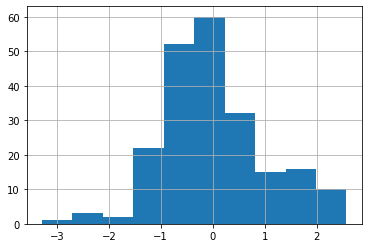

In [26]:
scaled_std_app.hist()

In [33]:
pd.get_dummies(cities_df['country'])

,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Czech Republic,Denmark,...,Romania,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
countries = cities_df['country'].unique()

In [36]:
def one_hot_manita(country):
    one_hot_base = {x:0 for x in countries}
    one_hot_base[country] = 1
    return one_hot_base

In [40]:
pd.DataFrame(list(cities_df['country'].apply(lambda x: one_hot_manita(x))))

,Denmark,United Kingdom,Sweden,Turkey,Spain,France,Netherlands,Italy,Andorra,Romania,...,Albania,Austria,Finland,Lithuania,Slovenia,Montenegro,Croatia,Bosnia and Herzegovina,Macedonia,Estonia
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
city_pos = {value:i for i, value in enumerate(cities_df['city'].unique())}
cities_df['city'].apply(lambda x: city_pos[x])

0        0
1        1
2        2
3        3
4        4
      ... 
208    207
209    208
210    209
211    210
212    211
Name: city, Length: 213, dtype: int64

In [52]:
country_pos = {value:i for i, value in enumerate(cities_df['country'].unique())}
cities_df['country_codes']= cities_df['country'].apply(lambda x: country_pos[x])

In [50]:
cities_df['country'].astype('category').cat.codes

0       9
1      36
2      32
3      34
4      31
       ..
208    35
209    31
210    35
211    34
212    33
Length: 213, dtype: int8

In [56]:
cities_df['country_codes'].apply(lambda x: len(cities_df['country_codes'][cities_df['country_codes'] == x])/len(cities_df['country_codes']))

0      0.009390
1      0.061033
2      0.028169
3      0.112676
4      0.084507
         ...   
208    0.070423
209    0.084507
210    0.070423
211    0.112676
212    0.014085
Name: country_codes, Length: 213, dtype: float64

In [65]:
mean_temp = cities_df.groupby('country')['temperature'].max().to_dict()

In [66]:
mean_temp

{'Albania': 15.18,
 'Andorra': 9.6,
 'Austria': 7.86,
 'Belarus': 6.73,
 'Belgium': 9.65,
 'Bosnia and Herzegovina': 9.6,
 'Bulgaria': 11.93,
 'Croatia': 12.46,
 'Czech Republic': 8.05,
 'Denmark': 7.73,
 'Estonia': 4.82,
 'Finland': 4.72,
 'France': 14.98,
 'Germany': 8.88,
 'Greece': 17.41,
 'Hungary': 10.34,
 'Ireland': 10.0,
 'Italy': 17.9,
 'Latvia': 5.38,
 'Lithuania': 7.0,
 'Macedonia': 9.36,
 'Moldova': 8.6,
 'Montenegro': 9.99,
 'Netherlands': 8.93,
 'Norway': 5.53,
 'Poland': 8.31,
 'Portugal': 15.52,
 'Romania': 11.24,
 'Serbia': 10.34,
 'Slovakia': 9.65,
 'Slovenia': 9.27,
 'Spain': 17.38,
 'Sweden': 7.33,
 'Switzerland': 8.4,
 'Turkey': 18.67,
 'Ukraine': 10.02,
 'United Kingdom': 10.14}

In [67]:
cities_df['country_temp'] = cities_df.apply(lambda x: mean_temp[x['country']], axis = 1)

In [68]:
cities_df

,city,country,latitude,longitude,temperature,country_codes,country_temp
0,Aalborg,Denmark,57.03,9.92,7.52,0,7.73
1,Aberdeen,United Kingdom,57.17,-2.08,8.10,1,10.14
2,Abisko,Sweden,63.35,18.83,0.20,2,7.33
3,Adana,Turkey,36.99,35.32,18.67,3,18.67
4,Albacete,Spain,39.00,-1.87,12.62,4,17.38
...,...,...,...,...,...,...,...
208,Yevpatoriya,Ukraine,45.20,33.36,10.02,17,10.02
209,Zaragoza,Spain,41.65,-0.89,14.17,4,17.38
210,Zhytomyr,Ukraine,50.25,28.66,6.67,17,10.02
211,Zonguldak,Turkey,41.43,31.78,10.64,3,18.67


In [69]:
def frijol_o_no_frijol(temp):
    if temp < 10: return "frijol"
    return 'no_frijol'

In [70]:
cities_df['temperature'].apply(lambda x: frijol_o_no_frijol(x))

0         frijol
1         frijol
2         frijol
3      no_frijol
4      no_frijol
         ...    
208    no_frijol
209    no_frijol
210       frijol
211    no_frijol
212       frijol
Name: temperature, Length: 213, dtype: object

In [73]:
cities_part_1 = cities_df[0:5].copy()

In [74]:
cities_part_2 = cities_df[5:10].copy()

In [75]:
pd.concat([cities_part_1, cities_part_2])

,city,country,latitude,longitude,temperature,country_codes,country_temp
0,Aalborg,Denmark,57.03,9.92,7.52,0,7.73
1,Aberdeen,United Kingdom,57.17,-2.08,8.10,1,10.14
2,Abisko,Sweden,63.35,18.83,0.20,2,7.33
3,Adana,Turkey,36.99,35.32,18.67,3,18.67
4,Albacete,Spain,39.00,-1.87,12.62,4,17.38
5,Algeciras,Spain,36.13,-5.47,17.38,4,17.38
6,Amiens,France,49.90,2.30,10.17,5,14.98
7,Amsterdam,Netherlands,52.35,4.92,8.93,6,8.93
8,Ancona,Italy,43.60,13.50,13.52,7,17.90
9,Andorra,Andorra,42.50,1.52,9.60,8,9.60


In [76]:
cities_part_1.append(cities_part_2)

,city,country,latitude,longitude,temperature,country_codes,country_temp
0,Aalborg,Denmark,57.03,9.92,7.52,0,7.73
1,Aberdeen,United Kingdom,57.17,-2.08,8.10,1,10.14
2,Abisko,Sweden,63.35,18.83,0.20,2,7.33
3,Adana,Turkey,36.99,35.32,18.67,3,18.67
4,Albacete,Spain,39.00,-1.87,12.62,4,17.38
5,Algeciras,Spain,36.13,-5.47,17.38,4,17.38
6,Amiens,France,49.90,2.30,10.17,5,14.98
7,Amsterdam,Netherlands,52.35,4.92,8.93,6,8.93
8,Ancona,Italy,43.60,13.50,13.52,7,17.90
9,Andorra,Andorra,42.50,1.52,9.60,8,9.60


In [77]:
cities_part_1

,city,country,latitude,longitude,temperature,country_codes,country_temp
0,Aalborg,Denmark,57.03,9.92,7.52,0,7.73
1,Aberdeen,United Kingdom,57.17,-2.08,8.10,1,10.14
2,Abisko,Sweden,63.35,18.83,0.20,2,7.33
3,Adana,Turkey,36.99,35.32,18.67,3,18.67
4,Albacete,Spain,39.00,-1.87,12.62,4,17.38


In [80]:
cities_df = pd.read_csv('Cities.csv')
countries_df = pd.read_csv('Countries.csv')

In [87]:
pd.merge(cities_df, countries_df, on='country', validate='many_to_one')

,city,country,latitude,longitude,temperature,population,EU,coastline
0,Aalborg,Denmark,57.03,9.92,7.52,5.69,yes,yes
1,Odense,Denmark,55.40,10.38,7.73,5.69,yes,yes
2,Aberdeen,United Kingdom,57.17,-2.08,8.10,65.11,yes,yes
3,Belfast,United Kingdom,54.60,-5.96,8.48,65.11,yes,yes
4,Birmingham,United Kingdom,52.47,-1.92,8.81,65.11,yes,yes
...,...,...,...,...,...,...,...,...
208,Split,Croatia,43.52,16.47,12.46,4.23,yes,yes
209,Sarajevo,Bosnia and Herzegovina,43.85,13.38,9.60,3.80,no,yes
210,Skopje,Macedonia,42.00,21.43,9.36,2.08,no,no
211,Tallinn,Estonia,59.43,24.73,4.82,1.31,yes,yes


In [93]:
cities_df.dtypes

city            object
country         object
latitude       float64
longitude      float64
temperature    float64
dtype: object

In [95]:
countries_df.dtypes

country        object
population    float64
EU             object
coastline      object
dtype: object

In [100]:
cities_df.set_index("country").join(countries_df.set_index("country"))

,city,latitude,longitude,temperature,population,EU,coastline
country,,,,,,,
Albania,Elbasan,41.12,20.08,15.18,2.90,no,yes
Andorra,Andorra,42.50,1.52,9.60,0.07,no,no
Austria,Graz,47.08,15.41,6.91,8.57,yes,no
Austria,Innsbruck,47.28,11.41,4.54,8.57,yes,no
Austria,Linz,48.32,14.29,6.79,8.57,yes,no
...,...,...,...,...,...,...,...
United Kingdom,Edinburgh,55.95,-3.22,7.43,65.11,yes,yes
United Kingdom,Exeter,50.70,-3.53,10.14,65.11,yes,yes
United Kingdom,Glasgow,55.87,-4.25,8.60,65.11,yes,yes
